In [348]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style='white',context='notebook',palette='muted')
import matplotlib.pyplot as plt

train=pd.read_csv('D:/deeskpethuomian/train.csv')
test=pd.read_csv('D:/deeskpethuomian/test.csv')
display(train.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [349]:
print('训练数据大小：',train.shape)
print('预测数据大小:',test.shape)

训练数据大小： (891, 12)
预测数据大小: (418, 11)


In [350]:
display(train.head(),test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [351]:
full_train=pd.concat([train,test],ignore_index=True)
full_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [352]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<Axes: xlabel='Embarked', ylabel='Survived'>

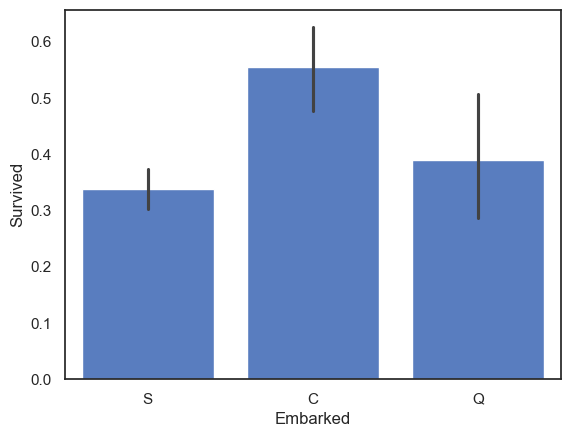

In [353]:
sns.barplot(data=train,x='Embarked',y='Survived')

In [354]:
s=full_train.groupby('Embarked')['Survived'].value_counts().to_frame()
display(s)
s2=s/s.groupby(level=0).sum()
display(s2)
pd.merge(s,s2,left_index=True,right_index=True,suffixes=['_num','_rate'])

count
Embarked Survived       
C        1.0          93
         0.0          75
Q        0.0          47
         1.0          30
S        0.0         427
         1.0         217

count
Embarked Survived          
C        1.0       0.553571
         0.0       0.446429
Q        0.0       0.610390
         1.0       0.389610
S        0.0       0.663043
         1.0       0.336957

count_num  count_rate
Embarked Survived                       
C        1.0              93    0.553571
         0.0              75    0.446429
Q        0.0              47    0.610390
         1.0              30    0.389610
S        0.0             427    0.663043
         1.0             217    0.336957

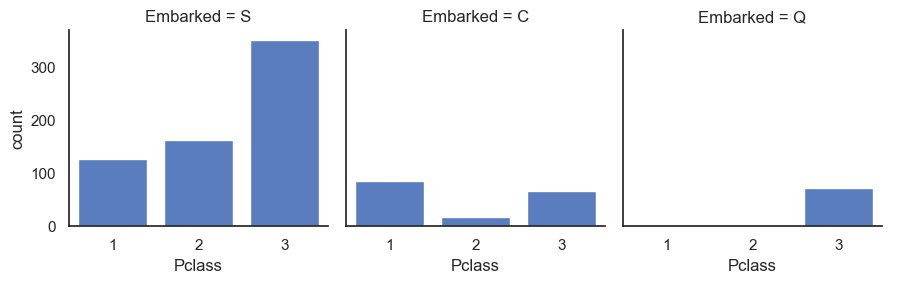

In [355]:
sns.catplot(x='Pclass',col='Embarked',data=train,kind='count',height=3,aspect=1)

<Axes: xlabel='Parch', ylabel='Survived'>

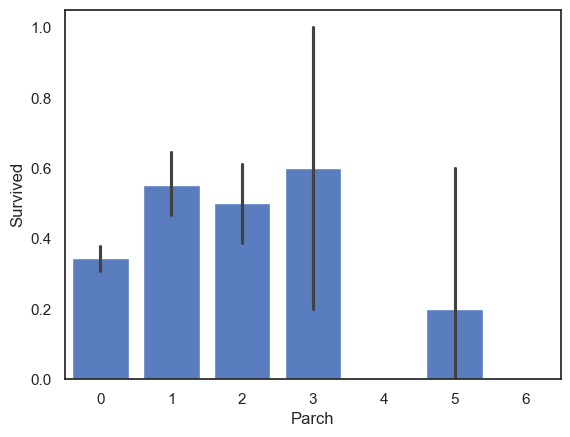

In [356]:
sns.barplot(data=train,x='Parch',y='Survived')


<Axes: xlabel='SibSp', ylabel='Survived'>

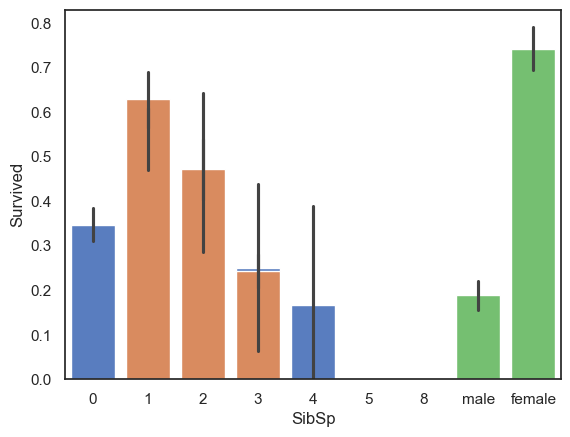

In [357]:
sns.barplot(data=train,x='SibSp',y='Survived')
sns.barplot(data=train,x='Pclass',y='Survived')
sns.barplot(data=train,x='Sex',y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

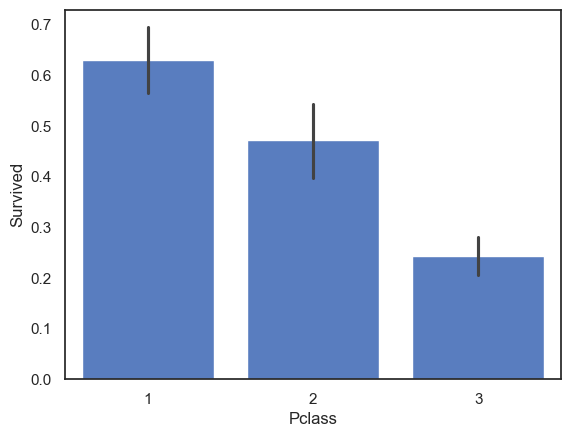

In [358]:
sns.barplot(data=train,x='Pclass',y='Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

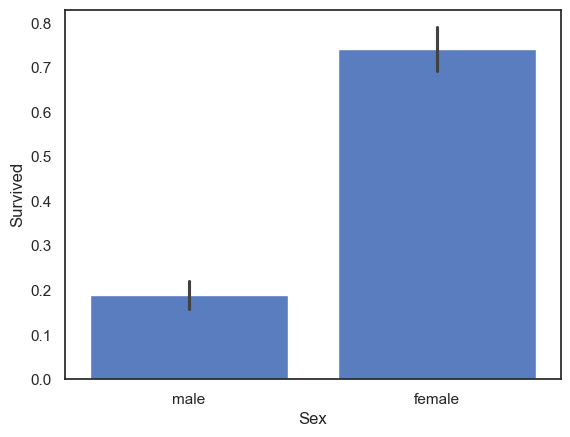

In [359]:
sns.barplot(data=train,x='Sex',y='Survived')

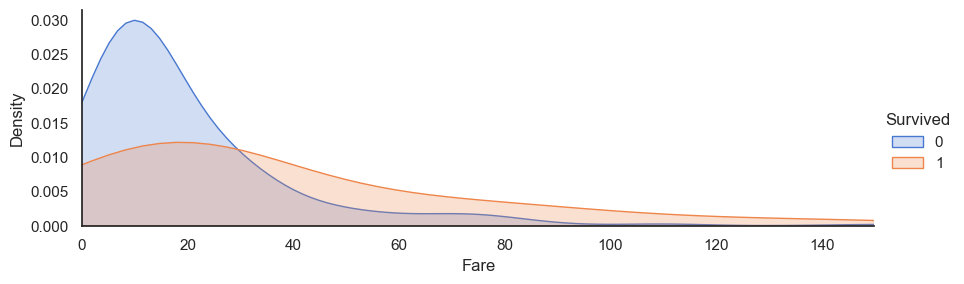

In [360]:
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

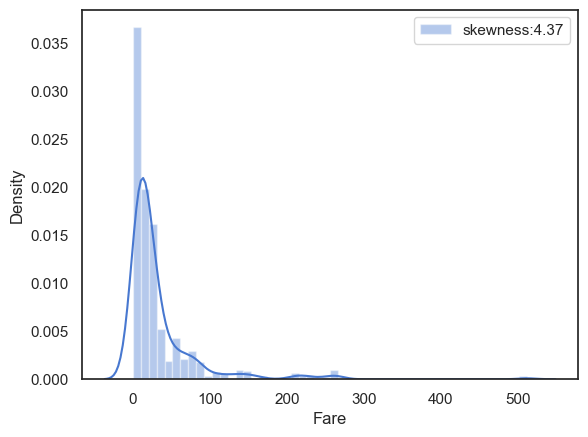

In [361]:
farePlot=sns.distplot(full_train['Fare'][full_train['Fare'].notnull()],
                     label='skewness:%.2f'%(full_train['Fare'].skew()))
farePlot.legend(loc='best')

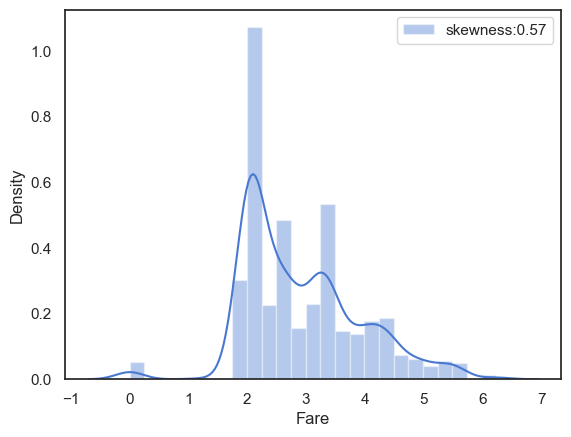

In [362]:
full_train['Fare']=full_train['Fare'].map(lambda x: np.log(x) if x>0 else x)

farePlot=sns.distplot(full_train['Fare'][full_train['Fare'].notnull()],
                     label='skewness:%.2f'%(full_train['Fare'].skew()))
farePlot.legend(loc='best')
plt.savefig('./10-Fare票价分布.png',dpi=200)


In [363]:
full_train['Cabin']=full_train['Cabin'].fillna('U')
full_train['Cabin'].head

<bound method NDFrame.head of 0          U
1        C85
2          U
3       C123
4          U
        ... 
1304       U
1305    C105
1306       U
1307       U
1308       U
Name: Cabin, Length: 1309, dtype: object>

In [364]:
display (full_train[full_train['Embarked'].isnull()])

display (full_train['Embarked'].value_counts())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [365]:
full_train['Embarked']=full_train['Embarked'].fillna('S')
full_train['Embarked'].head

<bound method NDFrame.head of 0       S
1       C
2       S
3       S
4       S
       ..
1304    S
1305    C
1306    S
1307    S
1308    C
Name: Embarked, Length: 1309, dtype: object>

In [366]:
display (full_train[full_train['Fare'].isnull()])

price=full_train[(full_train['Pclass']==3)&(full_train['Embarked']=='S')&(full_train['Cabin']=='U')]['Fare'].mean()
full_train['Fare']=full_train['Fare'].fillna(price)
full_train.info()





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [367]:
full_train['Title']=full_train['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
full_train['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [368]:
# 将title信息进行聚合
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Dona']='Royalty'
TitleDict['Dr'] ='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr'] ='Officer'
TitleDict['Rev']='Officer'

full_train['Title']=full_train['Title'].map(TitleDict)
full_train['Title'].value_counts()

Title
Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      4
Name: count, dtype: int64

In [369]:
# TitleDict={}
# TitleDict['Mr']='Mr'              
# TitleDict['Miss']='Miss' 
# TitleDict['Mrs']='Mrs' 
# TitleDict['Master']='Master' 
# TitleDict['Rev']='Officer' 
# TitleDict['Dr']='Officer' 
# TitleDict['Col']='Officer' 
# TitleDict['Mlle']='Miss' 
# TitleDict['Major']='Officer' 
# TitleDict['Ms']='Mrs' 
# TitleDict['Lady']='Royalty' 
# TitleDict['Sir']='Royalty' 
# TitleDict['Mme']='Mrs' 
# TitleDict['Don']='Royalty' 
# TitleDict['Capt']='Officer' 
# TitleDict['the Countess']='Royalty' 
# TitleDict['Jonkheer']='Master' 
# TitleDict['Dona']='Royalty' 

# full_train['Title']=full_train['Title'].map(TitleDict)
# full_train['Title'].value_counts()




<Axes: xlabel='Title', ylabel='Survived'>

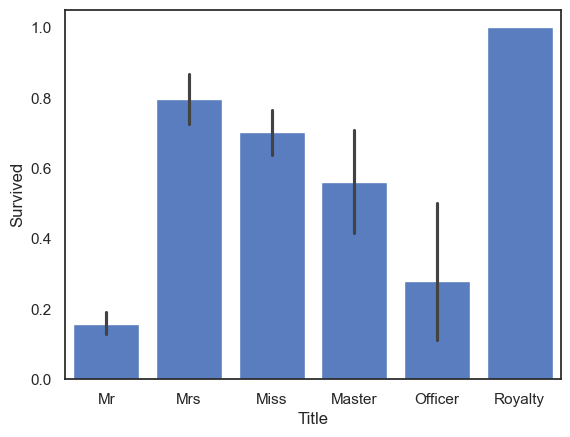

In [370]:
sns.barplot(data=full_train,x='Title',y='Survived')

<Axes: xlabel='familyNum', ylabel='Survived'>

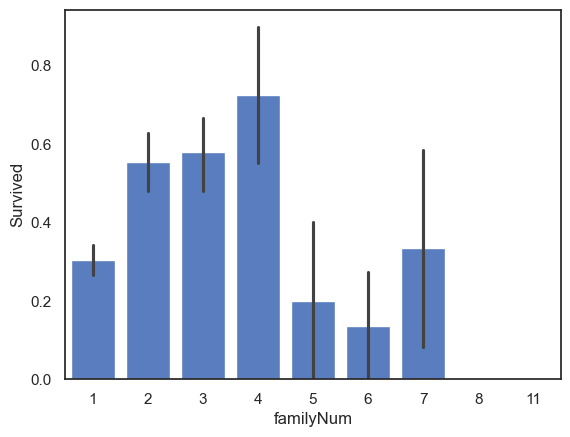

In [371]:
full_train['familyNum']=full_train['Parch']+full_train['SibSp']+1

sns.barplot(data=full_train,x='familyNum',y='Survived')

In [372]:
def familysize(familyNum):
    if familyNum==0:
        return 0
    elif (familyNum>=1)&(familyNum<=3):
        return 1
    else:
        return 2

full_train['familysze']=full_train['familyNum'].map(familysize)
full_train['familysze'].value_counts()

familysze
1    1184
2     125
Name: count, dtype: int64

<Axes: xlabel='familysze', ylabel='Survived'>

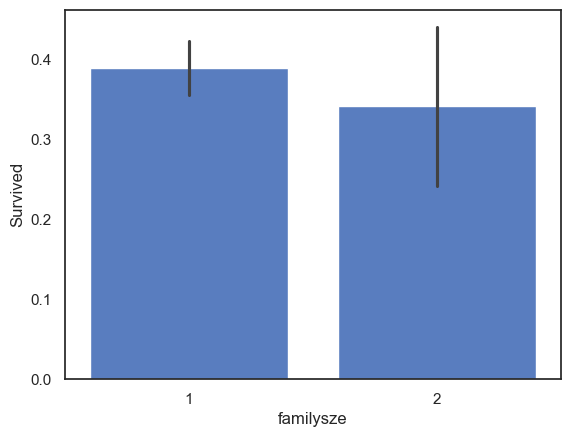

In [373]:
sns.barplot(data=full_train,x='familysze',y='Survived')

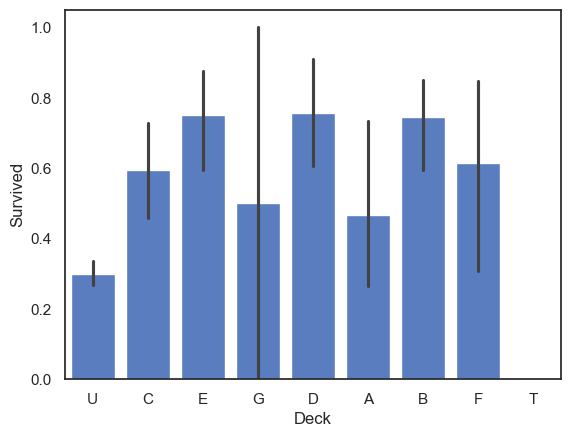

In [374]:
full_train['Deck']=full_train['Cabin'].map(lambda x:x[0])
sns.barplot(data=full_train,x='Deck',y='Survived')
plt.savefig('./14-Deck与Survived关系.png',dpi=200)

In [375]:
full_train['Cabin'].unique()

array(['U', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [376]:
TickCountDict=full_train['Ticket'].value_counts()
TickCountDict.head(20)

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
347077           7
347082           7
3101295          7
19950            6
113781           6
347088           6
382652           6
4133             5
W./C. 6608       5
PC 17757         5
349909           5
220845           5
113503           5
16966            5
LINE             4
Name: count, dtype: int64

<Axes: xlabel='TickCom', ylabel='Survived'>

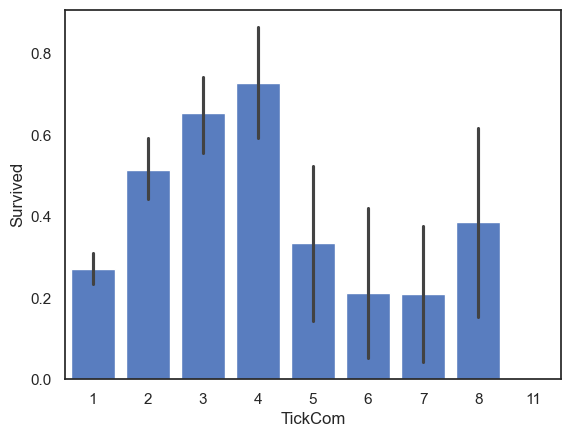

In [377]:
full_train['TickCom']=full_train['Ticket'].map(TickCountDict)
full_train['TickCom'].head()
sns.barplot(data=full_train,x='TickCom',y='Survived')

In [378]:
full_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum,familysze,Deck,TickCom
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,U,S,Mr,2,1,U,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,2,1,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,U,S,Miss,1,1,U,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,Mrs,2,1,C,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,U,S,Mr,1,1,U,1


<Axes: xlabel='TickGroup', ylabel='Survived'>

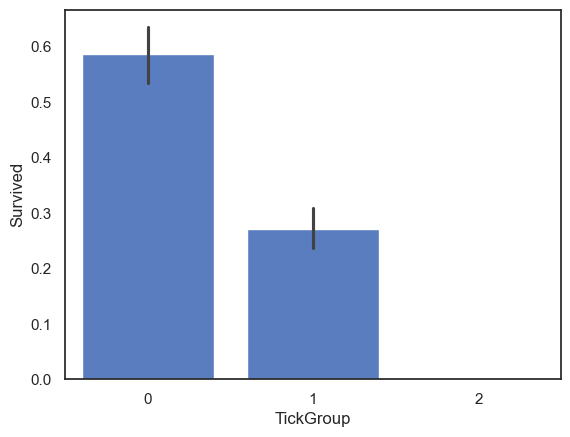

In [379]:
def TickCountGroup(num):
    if (num>=2)&(num<=4):
        return 0
    elif (num==1)|((num>=5)&(num<=8)):
        return 1
    else:
        return 2

full_train['TickGroup']=full_train['TickCom'].map(TickCountGroup)
sns.barplot(data=full_train,x='TickGroup',y='Survived')

In [380]:
full_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1308 non-null   object 
 13  familyNum    1309 non-null   int64  
 14  familysze    1309 non-null   int64  
 15  Deck         1309 non-null   object 
 16  TickCom      1309 non-null   int64  
 17  TickGroup    1309 non-null   int64  
dtypes: float64(3), int64(8), object(7)
memory usage:

In [381]:
# full_train[full_train['Age'].notnull()].corr()

In [382]:
corr_result=full_train['Age'].corr(full_train['Age'])
print(f"Age相关系数：{corr_result}")


Age相关系数：1.0


In [383]:
import pandas as pd

# 1. 加载数据（确保路径正确，若已加载可复用 full）
# 替换为你的真实数据路径，示例：假设数据文件是 titanic.csv


# 2. 筛选数值列（必须排除含字符串的列！）
# 手动指定与示例匹配的数值列（根据示例结果的列名调整）
numeric_cols = [
    'PassengerId', 'Survived', 'Pclass', 'Age', 
    'SibSp', 'Parch', 'Fare', 'familyNum', 'TickCom', 'TickGroup'
]  

# 3. 清洗数值列（处理非数值、缺失值）
for col in numeric_cols:
    # 强制转数值，非法内容（如字符串）转 NaN
    full_train[col] = pd.to_numeric(full_train[col], errors='coerce')  
    # 用均值填充 NaN（与示例逻辑对齐，避免差异）
    full_train[col].fillna(full_train[col].mean(), inplace=True)  

# 4. 计算相关系数矩阵（与示例代码逻辑一致）
# 先筛选 Age 非空行，再取数值列计算 corr
corr_result = full_train[full_train['Age'].notnull()][numeric_cols].corr()  

# 5. 输出结果（与示例格式对齐）
print(corr_result.round(6))  # 保留6位小数，匹配示例精度

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.002812 -0.038354  0.025731 -0.055224  0.008942   
Survived       -0.002812  1.000000 -0.278618 -0.058544 -0.030845  0.062706   
Pclass         -0.038354 -0.278618  1.000000 -0.366371  0.060832  0.018322   
Age             0.025731 -0.058544 -0.366371  1.000000 -0.190747 -0.130872   
SibSp          -0.055224 -0.030845  0.060832 -0.190747  1.000000  0.373587   
Parch           0.008942  0.062706  0.018322 -0.130872  0.373587  1.000000   
Fare            0.018483  0.273412 -0.694465  0.173484  0.316025  0.327315   
familyNum      -0.031437  0.013984  0.050027 -0.196996  0.861952  0.792296   
TickCom        -0.010350  0.054093 -0.078554 -0.155070  0.679444  0.647029   
TickGroup       0.007477 -0.263375  0.308877 -0.004620 -0.021512 -0.089695   

                 Fare  familyNum   TickCom  TickGroup  
PassengerId  0.018483  -0.031437 -0.010350   0.007477  
Survived     0.273412   0.013

In [384]:
print(full_train['Age'].dtype)


float64


In [385]:
agePre=full_train[['Age','Parch','SibSp','familyNum','TickCom','Title']]

agePre=pd.get_dummies(agePre)
ageCorrDf=agePre.corr()
ageCorrDf['Age'].sort_values()

Title_Master    -0.358853
Title_Miss      -0.254146
familyNum       -0.196996
SibSp           -0.190747
TickCom         -0.155070
Parch           -0.130872
Title_Royalty    0.053174
Title_Officer    0.162818
Title_Mr         0.165476
Title_Mrs        0.198091
Age              1.000000
Name: Age, dtype: float64

In [386]:
agePre.head()

,Age,Parch,SibSp,familyNum,TickCom,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,0,1,2,1,False,False,True,False,False,False
1,38.0,0,1,2,2,False,False,False,True,False,False
2,26.0,0,0,1,1,False,True,False,False,False,False
3,35.0,0,1,2,2,False,False,False,True,False,False
4,35.0,0,0,1,1,False,False,True,False,False,False


In [387]:
ageKnown=agePre[agePre['Age'].notnull()]
ageUnKnown=agePre[agePre['Age'].isnull()]

ageKnown_X=ageKnown.drop(['Age'],axis=1)
ageKnown_y=ageKnown['Age']

ageUnknown_X=ageUnKnown.drop(['Age'],axis=1)

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=None,n_estimators=500,n_jobs=-1)
rfr.fit(ageKnown_X,ageKnown_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [388]:
# 模型得分
score = rfr.score(ageKnown_X,ageKnown_y)
print('模型预测年龄得分是：', score)




模型预测年龄得分是： 0.43132093935021487


In [389]:
# 预测年龄

# ageUnknown_predict = rfr.predict(ageUnknown.drop(['Age'], axis=1))


In [390]:
# # 填充预测数据
# full.loc[full['Age'].isnull(), ['Age']] = ageUnknown_predict

# full.info()  # 此时已无缺失值


In [391]:
full_train['Surname']=full_train['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict=full_train['Surname'].value_counts()
display(SurNameDict)
full_train['SurnameNum']=full_train['Surname'].map(SurNameDict)
MaleDf=full_train[(full_train['Sex']=='male')&(full_train['Age']>12)&(full_train['familyNum']>=2)]

MSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
MSurNamDf.head()
MSurNamDf.value_counts()



Surname
Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: count, Length: 875, dtype: int64

Survived
0.000000    73
0.383838    43
1.000000    19
0.191919    13
0.500000     3
0.255892     2
0.127946     2
0.691919     1
Name: count, dtype: int64

In [392]:
full_train['Surname']=full_train['Name'].map(lambda x:x.split(',')[0].strip())
SurNameDict=full_train['Surname'].value_counts()
display(SurNameDict)
full_train['SurnameNum']=full_train['Surname'].map(SurNameDict)
FemChildDf=full_train[(full_train['Sex']=='female')&(full_train['Age']<=12)&(full_train['familyNum']>=2)]

FCSurNamDf=MaleDf['Survived'].groupby(MaleDf['Surname']).mean()
FCSurNamDf.head()
FCSurNamDf.value_counts()


Surname
Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: count, Length: 875, dtype: int64

Survived
0.000000    73
0.383838    43
1.000000    19
0.191919    13
0.500000     3
0.255892     2
0.127946     2
0.691919     1
Name: count, dtype: int64

In [393]:


MSurNamDict=MSurNamDf[MSurNamDf.values==1].index
MSurNamDict

FCSurNamDict=FCSurNamDf[FCSurNamDf.values==0].index
FCSurNamDict











Index(['Abelson', 'Andersson', 'Arnold-Franchi', 'Backstrom', 'Baxter',
       'Bourke', 'Braund', 'Brown', 'Bryhl', 'Cavendish', 'Chaffee', 'Chapman',
       'Collyer', 'Cribb', 'Crosby', 'Danbom', 'Davidson', 'Dean', 'Douglas',
       'Fortune', 'Futrelle', 'Goldsmith', 'Graham', 'Gustafsson', 'Hagland',
       'Hakkarainen', 'Hansen', 'Harris', 'Hart', 'Hickman', 'Hocking', 'Hold',
       'Holverson', 'Jacobsohn', 'Jensen', 'Kantor', 'Kink', 'Klasen',
       'Laroche', 'Lefebre', 'Lennon', 'Lindell', 'Lobb', 'Mallet', 'Marvin',
       'McNamee', 'Meyer', 'Minahan', 'Moran', 'Nasser', 'Natsch', 'Navratil',
       'Newell', 'Nicholls', 'O'Brien', 'Olsen', 'Ostby', 'Panula', 'Pears',
       'Penasco y Castellana', 'Petterson', 'Renouf', 'Rosblom', 'Silvey',
       'Skoog', 'Taussig', 'Thorneycroft', 'Turpin', 'Van Impe', 'West',
       'White', 'Yasbeck', 'del Carlo'],
      dtype='object', name='Surname')

In [394]:
full_train.loc[(full_train['Survived'].isnull())&(full_train['Surname'].isin(MSurNamDict))&
(full_train['Sex']=='male'),'Sex']='female'
full_train.loc[(full_train['Survived'].isnull())&(full_train['Surname'].isin(MSurNamDict))&
(full_train['Sex']=='malle'),'Age']=5

full_train.loc[(full_train['Survived'].isnull())&(full_train['Surname'].isin(MSurNamDict))&
((full_train['Sex']=='female')|(full_train['Age']<=12)),'Sex']='male'
full_train.loc[(full_train['Survived'].isnull())&(full_train['Surname'].isin(MSurNamDict))&
((full_train['Sex']=='femalle')|(full_train['Age']<=12)),'Age']=60

In [396]:
fullSel=full_train.drop(['Cabin','Name','Ticket','PassengerId','Surname','SurnameNum'],axis=1)
corrDf=pd.DataFrame()
# corrDf=fullSel.corr()
# corrDf['Survived'].sort_values(ascending=True)





In [397]:
# corrDf['Survived'].sort_values(ascending=True)

In [399]:
fullSel=fullSel.drop(['Age','Parch','SibSp','familyNum','TickCom'],axis=1)
fullSel=pd.get_dummies(fullSel)
fullSel.head()

,Survived,Pclass,Fare,familysze,TickGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,1.981001,1,1,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,1.0,1,4.266662,1,0,True,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1.0,3,2.070022,1,1,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,1.0,1,3.972177,1,0,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,0.0,3,2.085672,1,1,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [402]:
experData=fullSel[fullSel['Survived'].notnull()]
preData=fullSel[fullSel['Survived'].isnull()]



In [409]:
experData_X=experData.drop('Survived',axis=1)
experData_y=experData['Survived']

preData_X=preData.drop('Survived',axis=1)

In [410]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier

In [411]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [412]:
from sklearn.linear_model import LogisticRegression

In [413]:
from sklearn.neighbors import KNeighborsClassifier

In [414]:
from sklearn.tree import DecisionTreeClassifier

In [415]:
from sklearn.svm import  SVC

In [416]:
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

In [417]:
kfold=StratifiedKFold(n_splits=10)

In [418]:
classifiers=[]

In [419]:
classifiers.append(SVC())

In [420]:
classifiers.append(DecisionTreeClassifier())

In [ ]:
classifiers.append(RandomTreeClassifier())

In [427]:
classifiers.append(ExtraTreesClassifier())

In [428]:
classifiers.append(GradientBoostingClassifier())

In [429]:
classifiers.append(KNeighborsClassifier())

In [430]:
classifiers.append(LogisticRegression())

In [431]:
classifiers.append(LinearDiscriminantAnalysis())

In [446]:
# cv_means=[]
# cv_std=[]
# for classifier in classifiers:

In [444]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# ----------------------
# 1. 数据加载与预处理
# ----------------------
# 替换为你的数据路径，Kaggle  Titanic 数据需包含 'Survived' 等列


# 拆分有标签（训练）和无标签（预测）数据


# 特征与标签分离


# 预处理管道：填充缺失值 + 标准化（针对数值特征）
# 这里简单处理，实际可区分数值/类别特征做更细预处理
# def preprocess(df):
#     # 复制数据避免修改原数据
#     df = df.copy()  
#     # 填充缺失值（数值用均值，类别用最频繁值，可根据实际调整）
#     imputer_num = SimpleImputer(strategy='mean')
#     imputer_cat = SimpleImputer(strategy='most_frequent')
    
#     # 数值特征（示例：Age, Fare）
#     num_cols = ['Age', 'Fare']
#     df[num_cols] = imputer_num.fit_transform(df[num_cols])
    
#     # 类别特征（示例：Embarked, Sex）
#     cat_cols = ['Embarked', 'Sex']
#     df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])
    
#     # 编码类别特征（LabelEncoder）
#     le = LabelEncoder()
#     for col in cat_cols:
#         df[col] = le.fit_transform(df[col])
    
#     # .drop 丢弃无意义列（如姓名、 Ticket 等，可根据需求调整）
#     return df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# 执行预处理


# ----------------------
# 2. 模型构建与交叉验证
# ----------------------
# classifiers = [
#     GradientBoostingClassifier(random_state=42),
#     KNeighborsClassifier(),
#     LogisticRegression(random_state=42),
#     LinearDiscriminantAnalysis()
# ]

# cv_results = []
# # 交叉验证配置
# kf = KFold(n_splits=5, shuffle=True, random_state=42)  

# for clf in classifiers:
#     # 管道：预处理 + 模型（这里预处理已提前做，实际可整合进管道）
#     pipeline = make_pipeline(StandardScaler(), clf)  
#     scores = cross_val_score(
#         pipeline, 
#         experData_X, 
#         experData_y, 
#         scoring='accuracy', 
#         cv=kf
#     )
#     cv_results.append(scores)

# ----------------------
# 3. 结果输出与模型选择
# ----------------------
# 打印交叉验证结果
# for name, scores in zip([clf.__class__.__name__ for clf in classifiers], cv_results):
#     print(f"{name}: 平均准确率 = {np.mean(scores):.4f}, 标准差 = {np.std(scores):.4f}")

# 选择最优模型（示例：选 GradientBoostingClassifier）
# best_clf = GradientBoostingClassifier(random_state=42)
# best_clf.fit(experData_X, experData_y)

# 预测无标签数据
# preData['Survived_pred'] = best_clf.predict(preData_X)

# 输出预测结果（可选：保存到文件）
# preData[['PassengerId', 'Survived_pred']].to_csv('predictions.csv', index=False)

In [462]:
# # GradientBoostingClassifier模型
# GBC = GradientBoostingClassifier()
# gb_param_grid = {'loss': ["deviance"],
#                  'n_estimators': [100, 200, 300],
#                  'learning_rate': [0.1, 0.05, 0.01],
#                  'max_depth': [4, 8],
#                  'min_samples_leaf': [100, 150],
#                  'max_features': [0.3, 0.1]
#                  }
# modelgsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv = kfold,
#                           scoring = "accuracy", n_jobs = -1, verbose = 1)
# modelgsGBC.fit(experData_X, experData_y)


# # LogisticRegression模型
# modelLR = LogisticRegression()
# LR_param_grid = {'C': [1, 2, 3],
#                  'penalty': ['l1', 'l2']}
# modelgsLR = GridSearchCV(modelLR, param_grid = LR_param_grid, cv = kfold,
#                          scoring = "accuracy", n_jobs = -1, verbose = 1)
# modelgsLR.fit(experData_X, experData_y)

# # SVC模型
# svc = SVC()
# gb_param_grid = {'C': [0.1, 0.5, 1, 2, 3, 5, 10],
#                  'kernel': ['rbf', 'poly', 'sigmoid']
#                  }
# modelgsSVC = GridSearchCV(svc, param_grid = gb_param_grid, cv = kfold,
#                           scoring = "accuracy", n_jobs = -1, verbose = 1)
# modelgsSVC.fit(experData_X, experData_y)

In [453]:
# # # LogisticRegression模型
# modelLR = LogisticRegression()
# LR_param_grid = {'C': [1, 2, 3],
#                  'penalty': ['l1', 'l2']}
# modelgsLR = GridSearchCV(modelLR, param_grid = LR_param_grid, cv = kfold,
#                          scoring = "accuracy", n_jobs = -1, verbose = 1)
# modelgsLR.fit(experData_X, experData_y)
# modelgsLR.best_score_

In [456]:
# # 导入必要库
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt
# import pandas as pd

# # 假设你已经有这些数据（需提前预处理好，无缺失、类别编码等 ）
# # fullSel = pd.read_csv('你的数据文件.csv')
# # experData = fullSel[fullSel['Survived'].notnull()]
# # experData_X = experData.drop('Survived', axis=1)
# # experData_y = experData['Survived'].astype(int)  # 确保标签是整数类型

# # 1. 定义模型、参数网格、交叉验证
# GBC = GradientBoostingClassifier()
# gb_param_grid = {
#     'loss': ["deviance"],
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'max_depth': [4, 8],
#     'min_samples_leaf': [100, 150],
#     'max_features': [0.3, 0.1]
# }
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# modelgsGBC = GridSearchCV(GBC, param_grid=gb_param_grid, cv=kfold, scoring="accuracy", n_jobs=-1, verbose=1)

# # 2. 执行训练！！！
# modelgsGBC.fit(experData_X, experData_y)

# # 3. 预测
# modelgsGBCtestpre_y = modelgsGBC.predict(experData_X.astype(int))

# # 4. 画 ROC 曲线（你原来的可视化代码 ）
# fpr, tpr, threshold = roc_curve(experData_y, modelgsGBCtestpre_y)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(10, 10))
# lw = 2
# plt.plot(fpr, tpr, color='r', lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Titanic GradientBoostingClassifier Model')
# plt.legend(loc="lower right")
# plt.show()

In [458]:
# 查看模型ROC曲线
# # 求出测试数据模型的预测值
# modelgsGBCtestpre_y = modelgsGBC.predict(experData_X.astype(int))
# # 画图
# from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# # Compute ROC curve and ROC area for each class
# fpr, tpr, threshold = roc_curve(experData_y, modelgsGBCtestpre_y) ###计算真正率和假正率
# roc_auc = auc(fpr, tpr)  ###计算auc的值

# plt.figure()
# lw = 2
# plt.figure(figsize=(10,10))
# plt.plot(fpr, tpr, color='r', 
#          lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Titanic GradientBoostingClassifier Model')
# plt.legend(loc="lower right")
# plt.show()

In [463]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
# print('GradientBoostingClassifier模型混淆矩阵为\n', confusion_matrix(experData_y, modelgsGBCtestpre_y))
# print('LogisticRegression模型混淆矩阵为\n', confusion_matrix(experData_y, modelgsLRtestpre_y))
# print('SVC模型混淆矩阵为\n', confusion_matrix(experData_y, modelgsSVCtestpre_y))